<a href="https://colab.research.google.com/github/Nazneen-akram/modern_python_3.12/blob/main/L2_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import time
np.random.seed(42)

In [11]:
# Generate 20 data points with 2 dimensions
X = np.random.rand(20,2)
X

array([[0.36778313, 0.63230583],
       [0.63352971, 0.53577468],
       [0.09028977, 0.8353025 ],
       [0.32078006, 0.18651851],
       [0.04077514, 0.59089294],
       [0.67756436, 0.01658783],
       [0.51209306, 0.22649578],
       [0.64517279, 0.17436643],
       [0.69093774, 0.38673535],
       [0.93672999, 0.13752094],
       [0.34106635, 0.11347352],
       [0.92469362, 0.87733935],
       [0.25794163, 0.65998405],
       [0.8172222 , 0.55520081],
       [0.52965058, 0.24185229],
       [0.09310277, 0.89721576],
       [0.90041806, 0.63310146],
       [0.33902979, 0.34920957],
       [0.72595568, 0.89711026],
       [0.88708642, 0.77987555]])

In [12]:
X.shape

(20, 2)

In [9]:
Y = X.flatten()
Y.shape

(40,)

In [10]:
Y

array([0.80744016, 0.8960913 , 0.31800347, 0.11005192, 0.22793516,
       0.42710779, 0.81801477, 0.86073058, 0.00695213, 0.5107473 ,
       0.417411  , 0.22210781, 0.11986537, 0.33761517, 0.9429097 ,
       0.32320293, 0.51879062, 0.70301896, 0.3636296 , 0.97178208,
       0.96244729, 0.2517823 , 0.49724851, 0.30087831, 0.28484049,
       0.03688695, 0.60956433, 0.50267902, 0.05147875, 0.27864646,
       0.90826589, 0.23956189, 0.14489487, 0.48945276, 0.98565045,
       0.24205527, 0.67213555, 0.76161962, 0.23763754, 0.72821635])

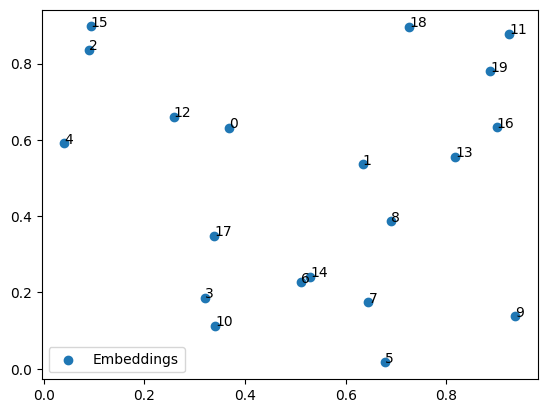

In [13]:
# Display Embeddings
n = range(len(X))

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], label='Embeddings')
ax.legend()

for i, txt in enumerate(n):
    ax.annotate(txt, (X[i,0], X[i,1]))

In [14]:
k = 4

neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
neigh.fit(X)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=4)

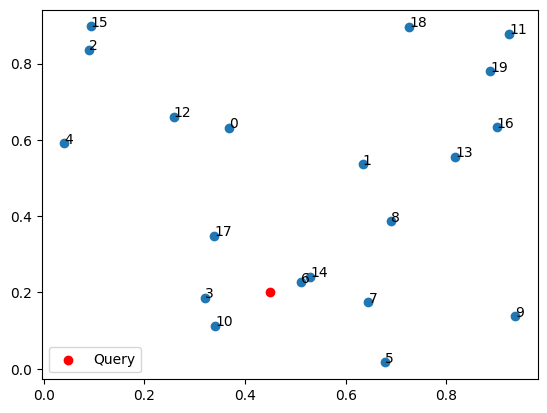

In [15]:
# Display Query with data
n = range(len(X))

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
ax.scatter(0.45,0.2, c='red',label='Query')
ax.legend()

for i, txt in enumerate(n):
    ax.annotate(txt, (X[i,0], X[i,1]))

In [16]:
neighbours = neigh.kneighbors([[0.45,0.2]], k, return_distance=True)
print(neighbours)

(array([[0.06750981, 0.08997682, 0.12992129, 0.1391164 ]]), array([[ 6, 14,  3, 10]]))


In [17]:
t0 = time.time()
neighbours = neigh.kneighbors([[0.45,0.2]], k, return_distance=True)
t1 = time.time()

query_time = t1-t0
print(f"Runtime: {query_time: .4f} seconds")

Runtime:  0.0020 seconds


In [18]:
def speed_test(count):
    # generate random objects
    data = np.random.rand(count,2)

    # prepare brute force index
    k=4
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)

    # measure time for a brute force query
    t0 = time.time()
    neighbours = neigh.kneighbors([[0.45,0.2]], k, return_distance=True)
    t1 = time.time()

    total_time = t1-t0
    print (f"Runtime: {total_time: .4f}")

    return total_time

In [19]:
time20k = speed_test(20_000)

Runtime:  0.0027


In [20]:
# Brute force examples
time200k = speed_test(200_000)
time2m = speed_test(2_000_000)
time20m = speed_test(20_000_000)
time200m = speed_test(200_000_000)

Runtime:  0.0072
Runtime:  0.0344
Runtime:  0.3737
Runtime:  3.4867


## Brute force kNN implemented by hand on `768` dimensional embeddings

In [21]:
documents = 1000
dimensions = 768

embeddings = np.random.randn(documents, dimensions) # 1000 documents, 768-dimensional embeddings
embeddings = embeddings / np.sqrt((embeddings**2).sum(1, keepdims=True)) # L2 normalize the rows, as is common

query = np.random.randn(768) # the query vector
query = query / np.sqrt((query**2).sum()) # normalize query

In [22]:
# kNN
t0 = time.time()
# Calculate Dot Product between the query and all data items
similarities = embeddings.dot(query)
# Sort results
sorted_ix = np.argsort(-similarities)
t1 = time.time()

total = t1-t0
print(f"Runtime for dim={dimensions}, documents_n={documents}: {np.round(total,3)} seconds")

print("Top 5 results:")
for k in sorted_ix[:5]:
    print(f"Point: {k}, Similarity: {similarities[k]}")

Runtime for dim=768, documents_n=1000: 0.008 seconds
Top 5 results:
Point: 41, Similarity: 0.09255669806429376
Point: 930, Similarity: 0.0912314364392932
Point: 262, Similarity: 0.08984100454615689
Point: 376, Similarity: 0.08517047613854783
Point: 313, Similarity: 0.08361981061441696


In [23]:
n_runs = [1_000, 10_000, 100_000, 500_000]

for n in n_runs:
    embeddings = np.random.randn(n, dimensions) #768-dimensional embeddings
    query = np.random.randn(768) # the query vector

    t0 = time.time()
    similarities = embeddings.dot(query)
    sorted_ix = np.argsort(-similarities)
    t1 = time.time()

    total = t1-t0
    print(f"Runtime for 1 query with dim={dimensions}, documents_n={n}: {np.round(total,3)} seconds")

Runtime for 1 query with dim=768, documents_n=1000: 0.001 seconds
Runtime for 1 query with dim=768, documents_n=10000: 0.006 seconds
Runtime for 1 query with dim=768, documents_n=100000: 0.053 seconds
Runtime for 1 query with dim=768, documents_n=500000: 0.276 seconds


In [24]:
print (f"To run 1,000 queries: {total * 1_000/60 : .2f} minutes")

To run 1,000 queries:  4.59 minutes
